# Principal Component Analysis (PCA)
### What is it, and what does it have to do with this week's project?

### Standard Scalar
Some people recommend using standard scalar to 'demean' the data

In [1]:
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain = xtrain.reshape(-1, 28*28)

In [5]:
ss = StandardScaler()
ss_xtrain = ss.fit_transform(xtrain)

In [6]:
ss_xtrain.shape

(60000, 784)

---

#### Let's start with some familiar code:

In [7]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

#### And let's write a function that takes in numpy arrays of images and renders/plots the first 40 of them:

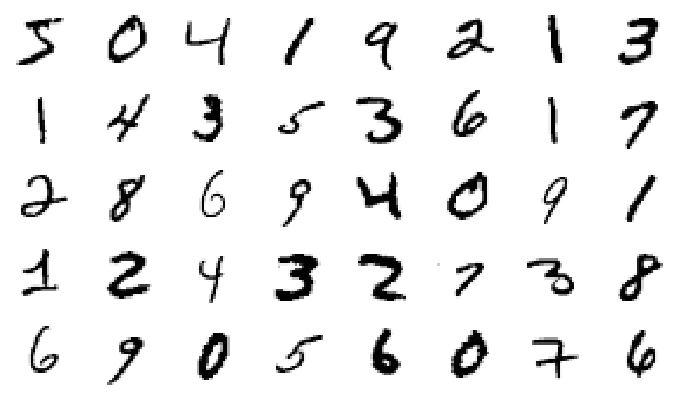

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

def draw_array(x):
    plt.figure(figsize=(12,
                        7))
    for i in range(40):
        plt.subplot(5, 8, i+1)
        plt.imshow(x[i], cmap=plt.cm.Greys)
        plt.axis('off')

draw_array(xtrain)

---

### 1. Need to reshape the data so that it can be properly handled in sklearn

In [9]:
xtrain.shape

(60000, 28, 28)

In [10]:
xtrain = xtrain.reshape(-1, 28*28)

### 2. Split training data even further (to speed up the calculation)

In [11]:
xsmall = xtrain[:1000]
ysmall = ytrain[:1000]

In [12]:
xsmall.shape

(1000, 784)

### 3. Initialize PCA from Scikit-Learn and fit on X data
- By how many components would we like to decompose our data?

In [13]:
from sklearn.decomposition import PCA

In [14]:
m = PCA(n_components=40)

In [15]:
m.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

---

- Notice that each of the components gives us 784 coefficients:

In [16]:
m.components_.shape

(40, 784)

---

- And we can see the percentage of the overall variation in the data that each principal contributes.

In [17]:
m.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883404,
       0.00839318, 0.00812578, 0.00786366, 0.0074473 , 0.00690852,
       0.0065809 , 0.00648143, 0.00602597, 0.0058655 , 0.00570016,
       0.00543475, 0.0050505 , 0.00487772, 0.00481247, 0.00471365])

### 4. Use the trained PCA model to transform the data to a lower number of features.

In [18]:
#new data - with less features
xt = m.transform(xsmall)

In [19]:
xsmall.shape

(1000, 784)

In [20]:
xt.shape

(1000, 40)

---

### 5. Use the inverse_transform() method to expand our reduced data back into its original shape.

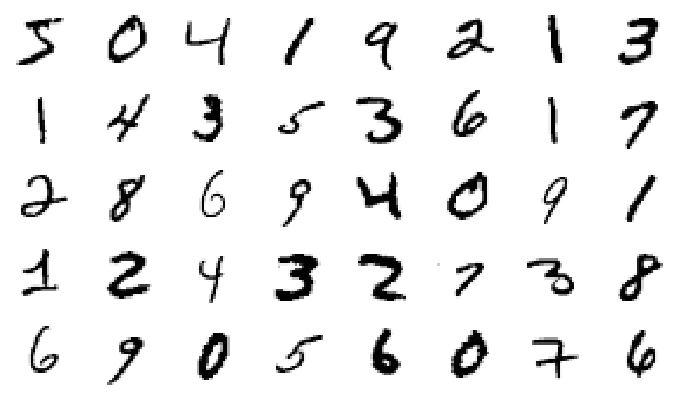

In [21]:
draw_array(xsmall.reshape(-1,28,28))

---

### 6. Visualize what our data looks after it has been reduced to N features.

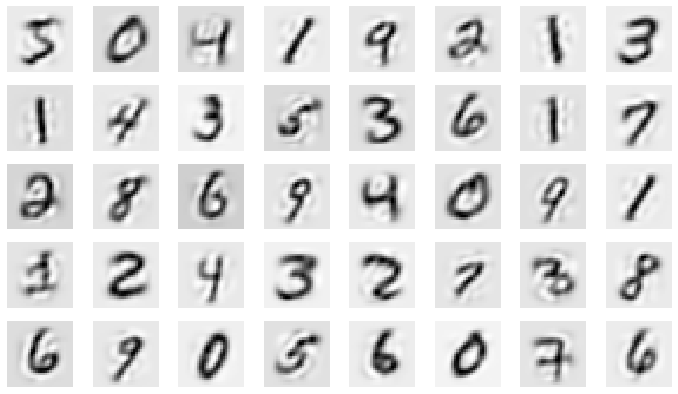

In [22]:
xback = m.inverse_transform(xt)
draw_array(xback.reshape(-1,28,28))

---

### 7. Can we actually see what the components look like, as well?

In [23]:
m.explained_variance_ratio_[:8]

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895])

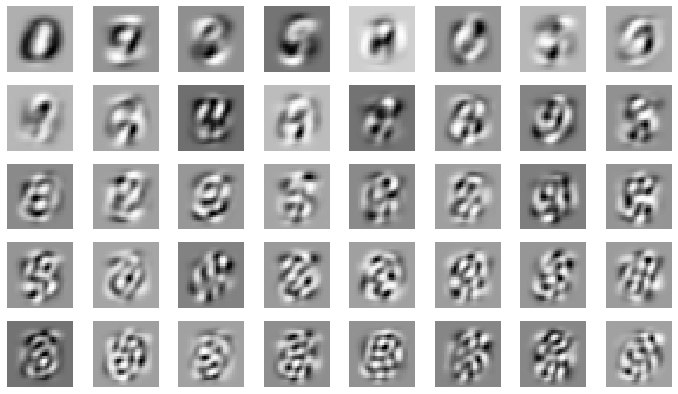

In [24]:
comp = m.components_.reshape(-1,28,28)
draw_array(comp)

In [25]:
msmall = PCA(n_components=1)
msmall.fit(xsmall)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
xs = msmall.transform(xsmall)
xs = msmall.inverse_transform(xs)

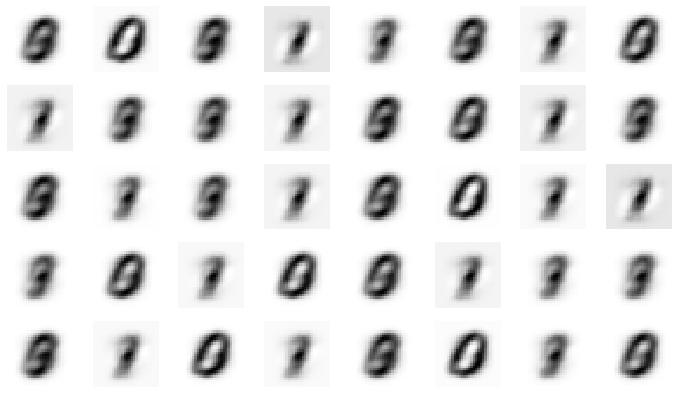

In [27]:
draw_array(xs.reshape(-1,28,28))

---

### 8. How can this be applied in practice (e.g. on this week's project)?


* Increase up the training speed of your models - save time
* Upsampling technique - use pca to create new data points

---

### 9. Other interesting analysis:
- Examine the false positives using a confusion matrix.

In [28]:
m

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
xt.shape

(1000, 40)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5, max_depth=3)
rf.fit(xt,ysmall)
print(rf.score(xt,ysmall))

0.603


In [31]:
xtest.shape

(10000, 28, 28)

In [32]:
xtest = m.transform(xtest.reshape(-1,784))

In [33]:
ypred = rf.predict(xtest)

In [34]:
from sklearn.metrics import confusion_matrix


In [35]:
conf = confusion_matrix(ytest, ypred)
conf

array([[462, 132,  42,  64,  15,  90,   8, 126,  15,  26],
       [ 12, 975,  20,   8,  13,   4,   4,  11,  83,   5],
       [ 21,  15, 660,  40, 106,  31,  12,  34,  89,  24],
       [ 12,  13,  66, 478,  30, 124,  10, 157,  55,  65],
       [ 18,  53,  37,  20, 492,  17,  18,  47,  13, 267],
       [118,  48,  51,  70,  53, 125,   2, 138, 140, 147],
       [ 32,  13, 102,  36, 200,  24, 357,  73,  57,  64],
       [ 55,  46,  24,  80,  78,  41,   0, 459,  85, 160],
       [  6,  10,  68,  28,  88,  15,   4,  31, 628,  96],
       [ 15,  47,  18,  16, 245,   4,   1,  53,  40, 570]])

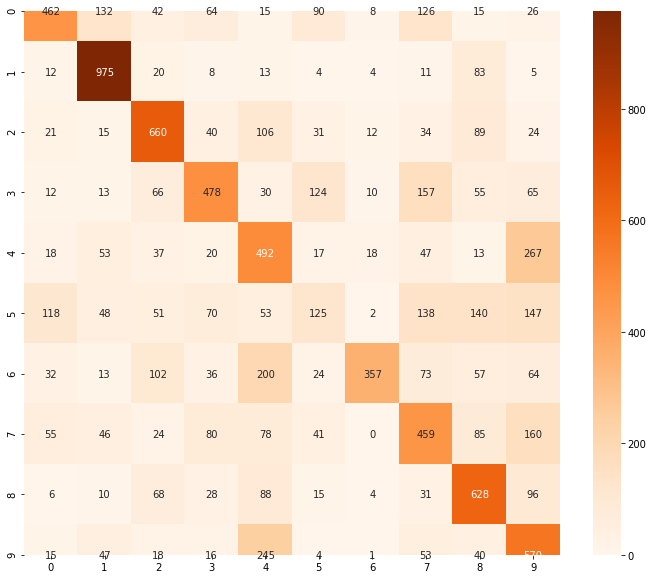

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
sns.heatmap(conf, cmap='Oranges', annot=True, fmt='g')

---

### 10. Other interesting analysis:
- We can see how much of an impact adding more components has on capturing the overall variance of the original data set.
- We can do this by transforming the data with another PCA model that captures the maximum number of components (which in our case is 784) and plotting the cumulative sum of the explained variance ratio.

In [37]:
xtrain.shape

(60000, 784)

In [38]:
m784 = PCA(n_components=10)
x = m784.fit_transform(xtrain)

In [39]:
import numpy as np

In [40]:
ex_var = m784.explained_variance_ratio_
ex = range(784)
y = np.array(ex_var).cumsum()

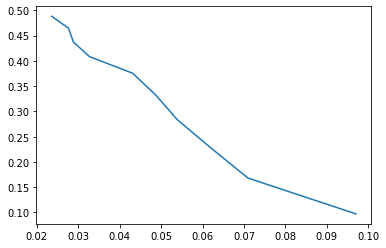

In [45]:
plt.plot(ex_var,y)
None

In [46]:
x.shape

(60000, 10)